In [1]:
import earthshine as etools 

import matplotlib.pylab as plt
import numpy as np
import scipy.integrate as integrate

from scipy.interpolate import interp1d

import time

################################################################################

# This will reload modules that have been edited
%load_ext autoreload
%autoreload 2


In [2]:
import scipy
print(scipy.__version__)

1.12.0


# Test out 2D interpolation

In [3]:
from scipy.interpolate import RectBivariateSpline as rbs

In [4]:
energy_org = [10, 100, 200, 250]
distance = [1,5,10, 14, 15, 19]

e,d = np.meshgrid(energy_org, distance)

energy_final = 2*e + 3*d

print(energy_final)

# Y and then x
interp = rbs(distance, energy_org, energy_final)


[[ 23 203 403 503]
 [ 35 215 415 515]
 [ 50 230 430 530]
 [ 62 242 442 542]
 [ 65 245 445 545]
 [ 77 257 457 557]]


In [5]:
print(interp(8, 120))

print(interp(5, 200))

[[264.]]
[[415.]]


# Generate log-spaced numbers

In [6]:
x = np.geomspace(1,100,21)
print(x)

[  1.           1.25892541   1.58489319   1.99526231   2.51188643
   3.16227766   3.98107171   5.01187234   6.30957344   7.94328235
  10.          12.58925412  15.84893192  19.95262315  25.11886432
  31.6227766   39.81071706  50.11872336  63.09573445  79.43282347
 100.        ]


[1.00000000e+00 1.28467489e+00 1.65038957e+00 2.12021404e+00
 2.72378574e+00 3.49917914e+00 4.49530758e+00 5.77500877e+00
 7.41900875e+00 9.53101425e+00 1.22442547e+01 1.57298865e+01
 2.02077902e+01 2.59604407e+01 3.33507263e+01 4.28448406e+01
 5.50416909e+01 7.07106781e+01 9.08402326e+01 1.16700166e+02
 1.49921773e+02 1.92600737e+02 2.47429330e+02 3.17866247e+02
 4.08354786e+02 5.24603140e+02 6.73944481e+02 8.65799551e+02
 1.11227094e+03 1.42890655e+03 1.83568037e+03 2.35825247e+03
 3.02958773e+03 3.89203529e+03 5.00000000e+03]


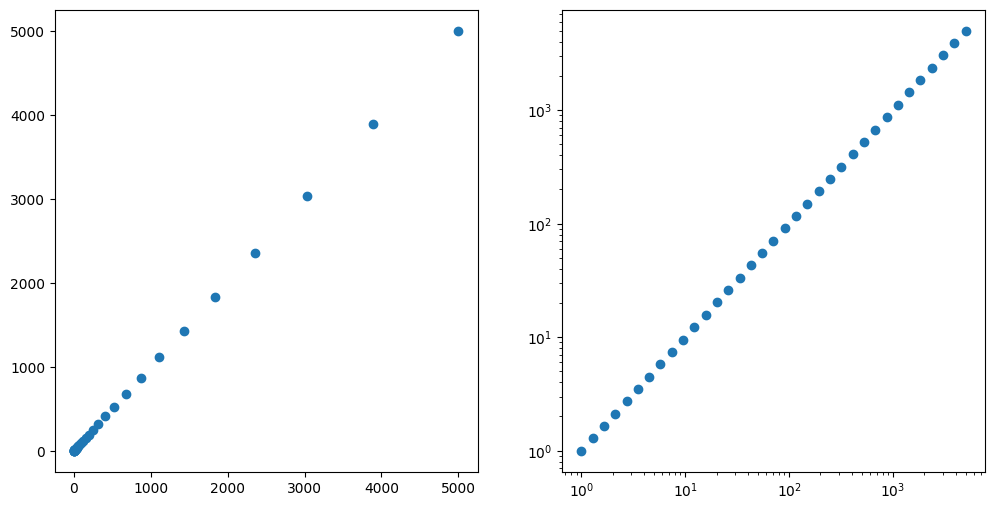

In [7]:
x = np.geomspace(1,5000,35)
print(x)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(x,x,'o')

plt.subplot(1,2,2)
plt.plot(x,x,'o')
plt.xscale('log')
plt.yscale('log')

# Solid angle

https://en.wikipedia.org/wiki/Steradian

https://math.stackexchange.com/questions/1244429/how-to-calculate-solid-angle-of-a-rectangular-detector-of-20cm-x-10cm


In [ ]:
length = 1 #
width = 1  #
radius = 1 #

area = length*width

omega = etools.solid_angle(length, width, radius)

print(f"length: {length}")
print(f"width: {width}")
print(f"area: {area}\n")

print(f"radius: {radius}\n")

print(f"omega:    {omega}")
print(f"omega^-1: {1/omega}")

In [ ]:
#length = 1 #
#width = 1  #
radius = np.linspace(1,1000,1000)

CMS_length = 21 # meters
CMS_width = 15 # meters
area_of_CMS = CMS_length*CMS_width 

omega = etools.solid_angle(CMS_length, CMS_width, radius)

plt.plot(radius,omega)
plt.xscale('log')
plt.xlabel('Distance from CMS (m)', fontsize=18)
plt.ylabel('Solid angle subtended by CMS (sr)', fontsize=14)

# Volume/area of shells

In [ ]:
# How "many" of these 1m^2 chunks are there at distance=distance
# *below* CMS (hemisphere)

shell_thickness = 1 # meter
radius = np.linspace(1,1000,1000)

hemisphere_area = 2*np.pi*(radius**2) # in m^2

shell_volume = hemisphere_area*shell_thickness


plt.plot(radius,shell_volume)
#plt.xscale('log')
plt.xlabel('Distance from CMS (m)', fontsize=18)
plt.ylabel('Volume of each shell (m^3)', fontsize=14)

In [ ]:
plt.plot(radius,shell_volume*omega)
#plt.xscale('log')
plt.xlabel('Distance from CMS (m)', fontsize=18)
plt.ylabel('$V \\times \Omega$', fontsize=14)

# Energy loss

In [ ]:
e = 1e9 # goes in as eV
distance = 1


for step_size in np.linspace(0.1,1,10):
    ke_final = etools.final_energy_after_distance_traveled(e, distance, step_size=step_size)

    print(f"ke_i: {e:.5e}   ke_f: {ke_final:.5e}     distance: {distance}   step size: {step_size}")
    
print()

e = 1e9 # goes in as eV
distance = 1

for step_size in np.linspace(0.01,0.1,10):
    ke_final = etools.final_energy_after_distance_traveled(e, distance, step_size=step_size)

    print(f"ke_i: {e:.5e}   ke_f: {ke_final:.5e}     distance: {distance}   step size: {step_size}")
        
print()

for step_size in np.linspace(0.001,0.01,10):
    ke_final = etools.final_energy_after_distance_traveled(e, distance, step_size=step_size)

    print(f"ke_i: {e:.5e}   ke_f: {ke_final:.5e}     distance: {distance}   step size: {step_size}")
    
    

In [ ]:
e = 60e9 # goes in as eV
distance = 100

'''
for step_size in np.linspace(0.001,0.01,10):
    ke_final = etools.final_energy_after_distance_traveled(e, distance, step_size=step_size, mass=105e6, IS_E=True)

    print(f"ke_i: {e:.5e}   ke_f: {ke_final:.5e}     distance: {distance}   step size: {step_size}")
        
print()
'''

'''
for step_size in [distance-0.0001]:
    ke_final = etools.final_energy_after_distance_traveled(e, distance, step_size=step_size, mass=105e6, IS_E=True)

    print(f"ke_i: {e:.5e}   ke_f: {ke_final:.5e}     distance: {distance}   step size: {step_size}")
        
print()
'''

#'''
for step_size in [distance]:
    ke_final = etools.final_energy_after_distance_traveled(e, distance, mass=105e6, IS_E=True, ADAPTIVE_STEPSIZE=True)

    print(f"ke_i: {e:.5e}   ke_f: {ke_final:.5e}     distance: {distance}   step size: {step_size}")
        
print()
#'''

In [ ]:
e = 60e9
distance = 100
for step_size in [distance]:
    
    ke_final = etools.final_energy_after_distance_traveled(e, distance, mass=105e6, IS_E=True, step_size=distance)

    print(f"ke_i: {e:.5e}   ke_f: {ke_final:.5e}     distance: {distance}   step size: {step_size}")
print()


# Find the number

In [ ]:
npts = 50

energies = np.arange(0,npts,1) 
values = np.zeros(npts) 
new_values = np.zeros(npts) 

e = 20
values[e] = 10

plt.figure(figsize=(6,3))
plt.plot(energies,values,'o')

idx,central = etools.find_the_number(10, energies)
new_values[idx] = values[e]

print(idx,central)
plt.plot(energies,new_values,'o')


Can we do this as a histogram with weights?

In [ ]:
npts = 11

lo = 10
hi = 20

xpts = np.linspace(lo,hi,npts)
ypts = xpts**2 + 500

width = xpts[1] - xpts[0]
print(f'width: {width}')

#print(xpts)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(xpts,ypts)

h,bin_edges = np.histogram(xpts,range=(lo-width/2,hi+width/2),bins=npts, weights=ypts)

print('bin_edges')
print(bin_edges)

bin_width = bin_edges[1] - bin_edges[0]

print(f'bin_width: {bin_width}')

plt.subplot(1,2,2)

plt.plot(bin_edges[0:-1]+bin_width/2,h)

print('xpts')
print(xpts[0:5])
print(xpts[-5:])

print()
print('bin_edges')
print(bin_edges[0:5])
print(bin_edges[-5:])

print(len(xpts))
print(len(bin_edges))

new_xpts = bin_edges[0:-1] + bin_width/2
print(new_xpts)

In [ ]:
npts = 1001

lo = 10
hi = 20

xpts = 10e9*np.linspace(lo,hi,npts)
ypts = xpts**2 + 500
width = xpts[1] - xpts[0]

#print(xpts,ypts)

newxpts = np.zeros(npts)
newypts = np.zeros(npts)

distance = 100

for i in range(npts):
    x = etools.final_energy_after_distance_traveled(xpts[i], distance, mass=105e6, IS_E=True, ADAPTIVE_STEPSIZE=True)
    newxpts[i] = x
    newypts[i] = ypts[i]
    
#print(newxpts)
#print(newypts)
    
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(xpts,ypts)
plt.plot(newxpts,newypts)

In [ ]:
npts = 1001

lo = 100e9
hi = 200e9

xpts = np.linspace(lo,hi,npts)
ypts = xpts**2 + 500

#print(xpts,ypts)

#newxpts = np.zeros(npts)
#newypts = np.zeros(npts)

newxpts = []
newypts = []

#for distance in [10, 40, 50, 100]:
for distance in range(1,100,1):
    
    #print(distance)

    for i in range(npts):
        #x = etools.final_energy_after_distance_traveled(xpts[i], distance, mass=105e6, IS_E=True, ADAPTIVE_STEPSIZE=True)
        x = etools.final_energy_after_distance_traveled(xpts[i], distance, mass=105e6, IS_E=True, step_size=distance)

        newxpts.append(x)
        newypts.append(ypts[i])
    
#h,bin_edges = np.histogram(newxpts,range=(lo-width/2,hi+width/2),bins=npts, weights=newypts)
##################### FOR PROTOTYPING ###############################
#h,bin_edges = np.histogram(newxpts,range=(0,hi),bins=int(npts/2), weights=newypts)

#bin_width = bin_edges[1] - bin_edges[0]
#new_xpts_total = bin_edges[0:-1]+bin_width/2
#new_ypts_total = h
##################### FOR PROTOTYPING ###############################

new_xpts_total, new_ypts_total = etools.sum_up_shifted_energies(newxpts, newypts, \
                                                                energy_range=(0,hi), nbins=int(npts/2))

#print(newxpts)
#print(newypts)
    
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(xpts,ypts)
plt.plot(newxpts,newypts,'.')

plt.subplot(1,2,1)
#plt.plot(bin_edges[0:-1]+bin_width/2,h, 'o')


plt.subplot(1,2,2)
#plt.plot(bin_edges[0:-1]+bin_width/2,h, 'o')
plt.plot(new_xpts_total,new_ypts_total, 'o')


In [ ]:
npts = 10000

lo = 100e9
hi = 200e9

xpts = np.linspace(lo,hi,npts)

#xpts = np.geomspace(lo,hi,npts)


ypts = xpts**2 + 500
width = xpts[1] - xpts[0]

#print(xpts,ypts)

newxpts = []
newypts = []
newypts1 = []

distance = 50

for i in range(npts):
    x = etools.final_energy_after_distance_traveled(xpts[i], distance, mass=105e6, IS_E=True, ADAPTIVE_STEPSIZE=True)
    #print(xpts[i],x)
    newxpts.append(x)
    #newypts.append(ypts[i])
    # Do we need to multiply by the bin width to get the number of entries?
    newypts.append(ypts[i]*width)
    newypts1.append(ypts[i])

    
# Linear
new_xpts_total, new_ypts_total = etools.sum_up_shifted_energies(newxpts, newypts, \
                                                                energy_range=(0,hi), nbins=2*npts)

# Log sort of
#bin_ranges = np.geomspace(1,hi,1000)
#new_xpts_total, new_ypts_total = etools.sum_up_shifted_energies(newxpts, newypts, \
#                                                                nbins=bin_ranges)

    
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(xpts,ypts)
plt.plot(newxpts,newypts1)

plt.subplot(1,2,2)
#plt.plot(xpts,ypts)
plt.plot(new_xpts_total,new_ypts_total)



    
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(xpts,newxpts)

integrated = integrate.trapz(newypts, newxpts)
print(f"org:    {integrated}")

integrated = integrate.trapz(ypts, xpts)
print(f"eloss:  {integrated}")

integrated = integrate.trapz(new_ypts_total, new_xpts_total)
print(f"summed: {integrated}")


print(np.sum(ypts), np.sum(newypts), np.sum(new_ypts_total))

# Energy loss

## Limits of propagation



In [ ]:
plt.figure()
for energy in [10,25,50,75,100]:
    #energy = 50e9 # eV
    
    energy *= 1e9

    distance = 2000
    distance_traveled = 0

    ke_final = energy

    distances = [distance_traveled]
    energies = [energy]

    step = 0.1

    while distance_traveled<distance:

        ke_final = etools.final_energy_after_distance_traveled(ke_final, step, mass=105e6, IS_E=True, step_size=0.001)

        distance_traveled += step
        distances.append(distance_traveled)

        energies.append(ke_final)

        if ke_final<1e7:
            print(f"energy: {energy/1e9}     distance_traveled: {distance_traveled}")
            break


    plt.plot(distances, energies )

plt.ylim(0,1.1*energy)
plt.xlim(0,250)
    
    
    
plt.figure()
for energy in [100, 250,500,750,1000]:
    #energy = 50e9 # eV
    
    energy *= 1e9

    distance = 2000
    distance_traveled = 0

    ke_final = energy

    distances = [distance_traveled]
    energies = [energy]

    step = 1

    while distance_traveled<distance:

        ke_final = etools.final_energy_after_distance_traveled(ke_final, step, mass=105e6, IS_E=True, step_size=0.001)

        distance_traveled += step
        distances.append(distance_traveled)

        energies.append(ke_final)
        
        if ke_final<1e7:
            print(f"energy: {energy/1e9}     distance_traveled: {distance_traveled}")
            break
                  
    plt.plot(distances, energies )

plt.ylim(0,1.1*energy)


plt.figure()
for energy in [1000, 2500, 5000, 7500, 10000]:
    #energy = 50e9 # eV
    
    energy *= 1e9

    distance = 20000
    distance_traveled = 0

    ke_final = energy

    distances = [distance_traveled]
    energies = [energy]

    step = 1

    while distance_traveled<distance:

        ke_final = etools.final_energy_after_distance_traveled(ke_final, step, mass=105e6, IS_E=True, step_size=0.001)

        distance_traveled += step
        distances.append(distance_traveled)

        energies.append(ke_final)
        
        if ke_final<1e7:
            print(f"energy: {energy/1e9}     distance_traveled: {distance_traveled}")
            break
                  
    plt.plot(distances, energies )

plt.ylim(0,1.1*energy)


In [ ]:
'''
energy: 10.0     distance_traveled: 23.000000000000057
energy: 25.0     distance_traveled: 51.60000000000046
energy: 50.0     distance_traveled: 95.19999999999887
energy: 75.0     distance_traveled: 136.59999999999653
energy: 100.0     distance_traveled: 176.59999999999425
energy: 100.0     distance_traveled: 177
energy: 250.0     distance_traveled: 403
energy: 500.0     distance_traveled: 754
energy: 750.0     distance_traveled: 1090
energy: 1000.0     distance_traveled: 1417
energy: 1000.0     distance_traveled: 1417
energy: 2500.0     distance_traveled: 3280
energy: 5000.0     distance_traveled: 6214
energy: 7500.0     distance_traveled: 9042
energy: 10000.0     distance_traveled: 11806
'''

In [ ]:
#'''
cutoffs = {10e9: 25, \
           25e9: 55, \
           50e9: 100, \
           75e9: 140, \
           100e9: 180, \
           250e9: 420, \
           500e9: 760, \
           750e9: 1100, \
           1000e9: 1430, \
           2500e9: 3290, \
           5000e9: 6230, \
           7500e9: 9100, \
           10000e9: 11900
          }
#'''

for energy in [9, 10, 30, 100, 2500]:
    #energy = 50e9 # eV
    
    energy *= 1e9

    distance = 100
    distance_traveled = 0

    ke_final = energy
    
    ke_final = etools.final_energy_after_distance_traveled(ke_final, distance, mass=105e6, IS_E=True, step_size=0.01, cutoffs=cutoffs)

    print(f"energy: {energy:.3e}  final: {ke_final:.3e}")


In [ ]:
plt.figure()
for energy in [10,25,50,75,100]:
    #energy = 50e9 # eV
    
    energy *= 1e9

    distance = 2000
    distance_traveled = 0

    ke_final = energy

    distances = [distance_traveled]
    energies = [energy]

    step = 0.1

    while distance_traveled<distance:

        ke_final = etools.final_energy_after_distance_traveled(ke_final, step, mass=105e6, IS_E=True, step_size=0.001, cutoffs=cutoffs)

        distance_traveled += step
        distances.append(distance_traveled)

        energies.append(ke_final)

        if ke_final<1e7:
            print(f"energy: {energy:.3e}     distance_traveled: {distance_traveled}     ke_final: {ke_final:.3e}")
            break


    plt.plot(distances, energies )

plt.ylim(0,1.1*energy)
plt.xlim(0,250)
    
    
    
plt.figure()
for energy in [100, 250,500,750,1000]:
    #energy = 50e9 # eV
    
    energy *= 1e9

    distance = 2000
    distance_traveled = 0

    ke_final = energy

    distances = [distance_traveled]
    energies = [energy]

    step = 1

    while distance_traveled<distance:

        ke_final = etools.final_energy_after_distance_traveled(ke_final, step, mass=105e6, IS_E=True, step_size=0.001, cutoffs=cutoffs)

        distance_traveled += step
        distances.append(distance_traveled)

        energies.append(ke_final)
        
        if ke_final<1e7:
            print(f"energy: {energy:.3e}     distance_traveled: {distance_traveled}     ke_final: {ke_final:.3e}")
            break
                  
    plt.plot(distances, energies )

plt.ylim(0,1.1*energy)


plt.figure()
for energy in [1000, 2500, 5000, 7500, 10000]:
    #energy = 50e9 # eV
    
    energy *= 1e9

    distance = 20000
    distance_traveled = 0

    ke_final = energy

    distances = [distance_traveled]
    energies = [energy]

    step = 1

    while distance_traveled<distance:

        ke_final = etools.final_energy_after_distance_traveled(ke_final, step, mass=105e6, IS_E=True, step_size=0.001, cutoffs=cutoffs)

        distance_traveled += step
        distances.append(distance_traveled)

        energies.append(ke_final)
        
        if ke_final<1e7:
            print(f"energy: {energy:.3e}     distance_traveled: {distance_traveled}     ke_final: {ke_final:.3e}")
            break
                  
    plt.plot(distances, energies )

plt.ylim(0,1.1*energy)


In [ ]:
print()

In [ ]:
for key,val in cutoffs.items():
    print(key/1e9,val)

# Generate data for the interpolation function

In [8]:
# Generate the interpolation data
cutoffs = {}

final_energies = []
energies = []
distances = None

#for energy in np.arange(10,10000,10):
#for energy in np.arange(10,100,10):
# Org
#for idx,energy in enumerate(np.geomspace(1,10000,55)):
# High mass
for idx,energy in enumerate(np.geomspace(1,1000000,75)):

    final_energies.append([])
    energies.append(energy)
    distances = []
    #energy *= 1e9

    print(energy)

    
    #for distance in np.arange(int(energy),15000,10):
    #for distance in np.arange(0,15000,10):
    # Org
    #for distance in np.geomspace(1,15000,55):
    # High mass
    for distance in np.geomspace(1,1500000,75):

        #print(energy, distance)
    
        ke = energy*1e9

        #ke_final = etools.final_energy_after_distance_traveled(ke, distance, mass=105e6, IS_E=True, step_size=distance)
        ke_final = etools.final_energy_after_distance_traveled(ke, distance, mass=105e6, IS_E=True, ADAPTIVE_STEPSIZE=True)

        final_energies[idx].append(ke_final/1e9) # Save as GeV
        distances.append(distance)

        # Comment this out for the making the interpolated data
        #if ke_final<1e7:
        #    print(energy, distance, ke_final)
        #    cutoffs[energy] = distance+10
        #    break
            
            
#final_energies = []
#for key in data_for_interp.keys():
#    final_energies.append(data_for_interp[key])



1.0
1.2052609368708425
1.4526539259467808
1.7508270317357244
2.1102034285685956
2.543345761304649
3.0653952950565277
3.6946012051993025
4.452958509942655
5.366976945540476
6.468607661546326
7.796360130405233
9.396648314954696
11.325413151528121
13.650078065460137
16.451905877536625
19.828839491270713
23.898925662310504
28.80444153396298
34.71686818926561
41.84288507901582
50.431594871713614
60.7832312829723
73.2596542821523
88.29699955494092
106.42092440647247
128.26498305280612
154.59277364194784
186.324631193156
224.5697995539774
270.66520700332416
326.222200971167
393.18287557057704
473.8879609717656
571.1586478126435
688.3952069645503
829.6958520834916
1000.0
1205.2609368708427
1452.6539259467813
1750.827031735725
2110.2034285685963
2543.3457613046508
3065.39529505653
3694.6012051993025
4452.958509942656
5366.976945540476
6468.607661546327
7796.360130405237
9396.6483149547
11325.413151528126
13650.078065460139
16451.905877536643
19828.839491270715
23898.92566231053
28804.4415339629

In [9]:
print(final_energies)
print()
print()
print(distances)
print()
print(energies)

[[0.6466321622785212, 0.5717039921211138, 0.4878954255232019, 0.38596735741664057, 0.2637321513279953, 0.11562727906073014, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.84092802079539, 0.7633856568835024, 0.6764851559912779, 0.5706172247391801, 0.4438263029364253, 0.2946371009288097, 0.11790611026173047, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [1.0405213019872572, 0.967719718587686, 0.9065499

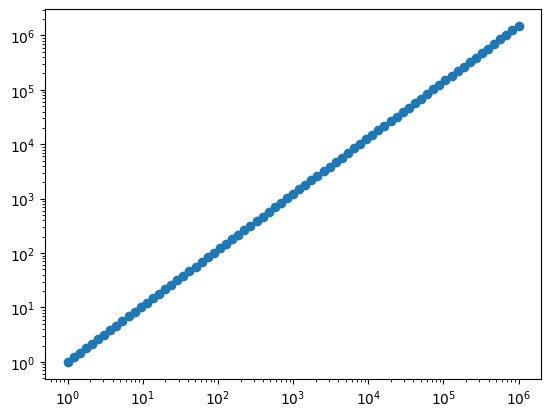

In [10]:
plt.plot(energies, distances, 'o')
plt.xscale('log')
plt.yscale('log')

In [11]:
energy_org = energies

print(len(final_energies))
print(len(final_energies[0]))
print(len(energy_org))
print(len(distances))

# Y and then x
interp = rbs(energy_org, distances, final_energies)


75
75
75
75


In [12]:
e = energy_org[3]
d = distances[2]
print(e,d)
print(final_energies[3][2])
print(interp(e, d))
print(interp(e, 5))

print()


e = energy_org[11]
d = distances[6]
print(e,d)
print(final_energies[11][6])
print(interp(e, d))
print(interp(e, 75))

print()
print(interp(800, 675))
print(interp(1000, 500))



1.7508270317357244 1.4686604012974966
1.1763925356576723
[[1.17639254]]
[[0.03517285]]

7.796360130405233 3.167846694941194
6.282212715603192
[[6.28221272]]
[[1.76789861e-05]]

[[303.27040028]]
[[619.8377344]]


https://scipython.com/book/chapter-8-scipy/examples/two-dimensional-interpolation-with-scipyinterpolaterectbivariatespline/

Text(0.5, 0, 'energy org [GeV]')

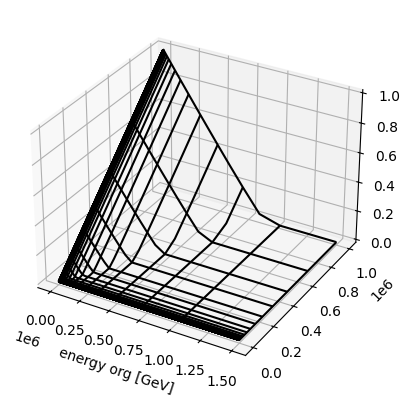

In [13]:
X,Y = np.meshgrid(distances, energy_org)
Z = interp(energy_org,distances)

fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': '3d'})
ax.plot_wireframe(X, Y, Z, color='k')
#ax[0].set_xscale('log')
#ax[0].set_yscale('log')
ax.set_xlabel('distances [m]')
ax.set_xlabel('energy org [GeV]')


In [14]:
data = {}
data['interp'] = interp
data['energy_org'] = energy_org
data['distances'] = distances
data['final_energies'] = final_energies

import pickle 

with open('energies_and_distances_file.pkl', 'wb') as fp:
    pickle.dump(data, fp)
    print('dictionary saved successfully to file')

#print(len(final_energies))
#print(len(final_energies[0]))
#print(len(energy_org))
#print(len(distances))

dictionary saved successfully to file


In [ ]:
for key,val in cutoffs.items():
    print(key,val)

In [ ]:
plt.figure()
for energy in [10,25,50,75,100]:
    #energy = 50e9 # eV
    
    energy *= 1e9

    distance = 2000
    distance_traveled = 0

    ke_final = energy

    distances = [distance_traveled]
    energies = [energy]

    step = 0.1

    while distance_traveled<distance:

        ke_final = etools.final_energy_after_distance_traveled(ke_final, step, mass=105e6, IS_E=True, step_size=0.001, cutoffs=cutoffs)

        distance_traveled += step
        distances.append(distance_traveled)

        energies.append(ke_final)

        if ke_final<1e7:
            print(f"energy: {energy:.3e}     distance_traveled: {distance_traveled}     ke_final: {ke_final:.3e}")
            break


    plt.plot(distances, energies )

plt.ylim(0,1.1*energy)
plt.xlim(0,250)
    
    
    
plt.figure()
for energy in [100, 250,500,750,1000]:
    #energy = 50e9 # eV
    
    energy *= 1e9

    distance = 2000
    distance_traveled = 0

    ke_final = energy

    distances = [distance_traveled]
    energies = [energy]

    step = 1

    while distance_traveled<distance:

        ke_final = etools.final_energy_after_distance_traveled(ke_final, step, mass=105e6, IS_E=True, step_size=0.001, cutoffs=cutoffs)

        distance_traveled += step
        distances.append(distance_traveled)

        energies.append(ke_final)
        
        if ke_final<1e7:
            print(f"energy: {energy:.3e}     distance_traveled: {distance_traveled}     ke_final: {ke_final:.3e}")
            break
                  
    plt.plot(distances, energies )

plt.ylim(0,1.1*energy)


plt.figure()
for energy in [1000, 2500, 5000, 7500, 10000]:
    #energy = 50e9 # eV
    
    energy *= 1e9

    distance = 20000
    distance_traveled = 0

    ke_final = energy

    distances = [distance_traveled]
    energies = [energy]

    step = 1

    while distance_traveled<distance:

        ke_final = etools.final_energy_after_distance_traveled(ke_final, step, mass=105e6, IS_E=True, step_size=0.001, cutoffs=cutoffs)

        distance_traveled += step
        distances.append(distance_traveled)

        energies.append(ke_final)
        
        if ke_final<1e7:
            print(f"energy: {energy:.3e}     distance_traveled: {distance_traveled}     ke_final: {ke_final:.3e}")
            break
                  
    plt.plot(distances, energies )

plt.ylim(0,1.1*energy)


In [ ]:
import pickle 

with open('cutoffs_file.pkl', 'wb') as fp:
    pickle.dump(cutoffs, fp)
    print('dictionary saved successfully to file')

In [ ]:
npts = 10001

lo = 10
hi = 5000

xpts = 10e9*np.linspace(lo,hi,npts)
ypts = xpts**2 + 500
width = xpts[1] - xpts[0]

#print(xpts,ypts)

newxpts = np.zeros(npts)
newypts = np.zeros(npts)

distance = 1000

for i in range(npts):
    x = etools.final_energy_after_distance_traveled(xpts[i], distance, mass=105e6, IS_E=True, ADAPTIVE_STEPSIZE=True, cutoffs=cutoffs)
    newxpts[i] = x
    newypts[i] = ypts[i]
    
#print(newxpts)
#print(newypts)
    


In [ ]:
plt.figure(figsize=(12,4))

#plt.subplot(1,2,1)
plt.plot(xpts,ypts)
plt.plot(newxpts,newypts)
plt.xlim(0.5e2)
plt.xlim(0,6000e9)